In [1]:
import weatherAPI
import pandas as pd
import numpy as np
import datetime
import pandas as pd
import seaborn as sns

In [2]:
weatherAPI.load2('20150412','20150412','146')

,location,date,avg_temperature(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%)
0,전주,20150412,14.1,0.0,1.5,35.5


In [3]:
AI_occur=pd.read_csv("HPAIOccurlist_final.csv")
AI_occur

,주소,축종,사육수,진단일,발생일,지역코드
0,경기도 과천시 문원동,야생조류-큰기러기,0,20140314,20140309,119
1,경기도 수원시 영통구 하동,야생조류-논병아리,0,20140304,20140227,119
2,경기도 수원시 팔달구 인계동,야생조류-기러기,0,20140131,20140128,119
3,전라남도 신안군 암태면 기동리,야생오리-청둥오리,0,20140131,20140127,165
4,전라남도 신안군 압해읍 신장리,야생조류-기타,0,20140217,20140127,165
...,...,...,...,...,...,...
1117,경기도 평택시 고덕면 동고리,닭-산란계,620000,20161222,20161216,232
1118,세종특별자치시 전동면 보덕리,닭-산란계,700000,20161128,20161126,133
1119,충청북도 음성군 금왕읍 신평리,메추리-비분류,726000,20201208,20201207,127
1120,충청북도 음성군 금왕읍 신평리,메추리-비분류,788000,20161231,20161229,127


In [4]:
#진단일 발생일 지역코드는 추후 날씨데이터와 연게하기 위해 문자타입으로 변환.
AI_occur['진단일']=AI_occur['진단일'].astype('str')
AI_occur['발생일']=AI_occur['발생일'].astype('str')
AI_occur['지역코드']=AI_occur['지역코드'].astype('str')

In [5]:
# 날씨data와 결합
weather_list=['location','date','avg_temperature(C)','daily_rain(mm)','avg_wind(m/s)','avg_r_humidity(%)']
for name in weather_list:
     AI_occur[name]=np.nan
for i in range(len(AI_occur)):
    start=AI_occur.loc[i,'발생일']
    w_data=weatherAPI.load2(start, start, AI_occur.loc[i,'지역코드'])
    try:
        for col in weather_list:
            AI_occur.loc[i,col]=w_data.loc[0,col]
    except:
        print('error index:', i)

In [6]:
AI_occur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   주소                  1122 non-null   object 
 1   축종                  1122 non-null   object 
 2   사육수                 1122 non-null   int64  
 3   진단일                 1122 non-null   object 
 4   발생일                 1122 non-null   object 
 5   지역코드                1122 non-null   object 
 6   location            1122 non-null   object 
 7   date                1122 non-null   object 
 8   avg_temperature(C)  1122 non-null   float64
 9   daily_rain(mm)      1122 non-null   float64
 10  avg_wind(m/s)       1122 non-null   float64
 11  avg_r_humidity(%)   1122 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 105.3+ KB


In [7]:
#info()요약정보 확인.
AI_occur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   주소                  1122 non-null   object 
 1   축종                  1122 non-null   object 
 2   사육수                 1122 non-null   int64  
 3   진단일                 1122 non-null   object 
 4   발생일                 1122 non-null   object 
 5   지역코드                1122 non-null   object 
 6   location            1122 non-null   object 
 7   date                1122 non-null   object 
 8   avg_temperature(C)  1122 non-null   float64
 9   daily_rain(mm)      1122 non-null   float64
 10  avg_wind(m/s)       1122 non-null   float64
 11  avg_r_humidity(%)   1122 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 105.3+ KB


In [8]:
# describe() 숫자형 변수에 대한 통계량 출력함수
AI_occur.describe()

,사육수,avg_temperature(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%)
count,1122.000000,1122.000000,1122.000000,1122.000000,1122.00000
mean,45135.445633,4.383066,1.569340,1.787344,64.72852
std,93493.103374,7.003435,9.624142,1.089902,14.56695
min,0.000000,-14.500000,0.000000,0.400000,0.00000
25%,8000.000000,0.100000,0.000000,1.000000,54.00000
50%,14450.000000,2.600000,0.000000,1.500000,64.50000
75%,33000.000000,7.200000,0.200000,2.300000,75.60000
max,920000.000000,29.500000,170.000000,9.100000,99.90000


In [9]:
# null값 확인
AI_occur.isnull().sum()

주소                    0
축종                    0
사육수                   0
진단일                   0
발생일                   0
지역코드                  0
location              0
date                  0
avg_temperature(C)    0
daily_rain(mm)        0
avg_wind(m/s)         0
avg_r_humidity(%)     0
dtype: int64

In [10]:
AI_occur

,주소,축종,사육수,진단일,발생일,지역코드,location,date,avg_temperature(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%)
0,경기도 과천시 문원동,야생조류-큰기러기,0,20140314,20140309,119,수원,20140309,1.8,5.6,2.9,58.4
1,경기도 수원시 영통구 하동,야생조류-논병아리,0,20140304,20140227,119,수원,20140227,6.7,0.0,1.6,69.8
2,경기도 수원시 팔달구 인계동,야생조류-기러기,0,20140131,20140128,119,수원,20140128,1.1,0.4,1.7,62.3
3,전라남도 신안군 암태면 기동리,야생오리-청둥오리,0,20140131,20140127,165,목포,20140127,2.2,0.0,1.9,77.1
4,전라남도 신안군 압해읍 신장리,야생조류-기타,0,20140217,20140127,165,목포,20140127,2.2,0.0,1.9,77.1
...,...,...,...,...,...,...,...,...,...,...,...,...
1117,경기도 평택시 고덕면 동고리,닭-산란계,620000,20161222,20161216,232,천안,20161216,-4.4,0.0,1.3,58.4
1118,세종특별자치시 전동면 보덕리,닭-산란계,700000,20161128,20161126,133,대전,20161126,0.2,3.0,0.7,87.5
1119,충청북도 음성군 금왕읍 신평리,메추리-비분류,726000,20201208,20201207,127,충주,20201207,1.3,0.0,1.2,67.9
1120,충청북도 음성군 금왕읍 신평리,메추리-비분류,788000,20161231,20161229,127,충주,20161229,-3.8,0.1,2.0,56.8


In [11]:
AI_occur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   주소                  1122 non-null   object 
 1   축종                  1122 non-null   object 
 2   사육수                 1122 non-null   int64  
 3   진단일                 1122 non-null   object 
 4   발생일                 1122 non-null   object 
 5   지역코드                1122 non-null   object 
 6   location            1122 non-null   object 
 7   date                1122 non-null   object 
 8   avg_temperature(C)  1122 non-null   float64
 9   daily_rain(mm)      1122 non-null   float64
 10  avg_wind(m/s)       1122 non-null   float64
 11  avg_r_humidity(%)   1122 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 105.3+ KB


In [18]:
#groupby(그룹바이대상컬럼명)[value컬럼명].mean().reset_index()
#뒤에 .reset_index() 추가하고 새로운 변수에 저장하면 데이터 프레임 생성.
#지역 별 사육수 상관관계 분석은 아니지만, 함수 이용을 위해 해봄.
AI_local_birds=AI_occur.groupby('사육수')['']
AI_local_birds

In [22]:
AI_occur['진단일']=AI_occur['진단일'].astype('str')
AI_occur['발생일']=AI_occur['발생일'].astype('str')
AI_occur['지역코드']=AI_occur['지역코드'].astype('str')

In [24]:
birds=AI_occur.groupby('사육수')
print(birds)

In [25]:
birds.groups

{0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22], 1: [23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], 3: [46, 47], 4: [48, 49], 5: [50, 51, 52, 53], 6: [54, 55, 56, 57, 58], 7: [59, 60, 61, 62, 63, 64], 10: [65, 66], 11: [67], 12: [68, 69, 70, 71], 13: [72, 73], 14: [74], 15: [75, 76, 77, 78, 79, 80], 18: [81], 19: [82], 20: [83, 84, 85], 24: [86, 87, 88], 26: [89, 90], 27: [91], 28: [92], 30: [93, 94, 95], 31: [96], 32: [97], 35: [98], 40: [99, 100], 42: [101], 46: [102], 48: [103, 104, 105], 50: [106, 107], 60: [108, 109], 66: [110, 111], 73: [112], 85: [113, 114], 91: [115], 100: [116, 117], 110: [118], 120: [119], 125: [120, 121], 130: [122], 131: [123], 150: [124], 160: [125], 210: [126], 229: [127], 236: [128], 300: [129, 130], 320: [131], 400: [132], 441: [133], 457: [134], 465: [135], 500: [136], 530: [137], 700: [138, 139, 140], 836: [141], 850: [142], 880: [143, 144], 900: [145], 920: [146], 10

In [27]:
ave=birds.mean()
print(ave)
print(AI_occur)

        avg_temperature(C)  daily_rain(mm)  avg_wind(m/s)  avg_r_humidity(%)
사육수                                                                         
0                 0.660870        1.478261       1.717391          69.278261
1                 9.152174        1.886957       2.086957          72.604348
3                 3.650000        0.000000       1.250000          72.200000
4                19.300000        1.750000       3.300000          77.600000
5                13.475000        2.000000       2.750000          67.900000
...                    ...             ...            ...                ...
620000           -1.550000        0.000000       1.000000          60.900000
700000            0.200000        3.000000       0.700000          87.500000
726000            1.300000        0.000000       1.200000          67.900000
788000           -3.800000        0.100000       2.000000          56.800000
920000            8.000000        0.000000       0.900000          51.800000

In [28]:
#사육수 별 평균 
ave

,avg_temperature(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%)
사육수,,,,
0,0.660870,1.478261,1.717391,69.278261
1,9.152174,1.886957,2.086957,72.604348
3,3.650000,0.000000,1.250000,72.200000
4,19.300000,1.750000,3.300000,77.600000
5,13.475000,2.000000,2.750000,67.900000
...,...,...,...,...
620000,-1.550000,0.000000,1.000000,60.900000
700000,0.200000,3.000000,0.700000,87.500000
726000,1.300000,0.000000,1.200000,67.900000


### 1) 사육수와 날씨의 상관관계
-사육수가 높을 수록 ???

In [13]:
AI_occur.describe()

,사육수,avg_temperature(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%)
count,1122.000000,1122.000000,1122.000000,1122.000000,1122.00000
mean,45135.445633,4.383066,1.569340,1.787344,64.72852
std,93493.103374,7.003435,9.624142,1.089902,14.56695
min,0.000000,-14.500000,0.000000,0.400000,0.00000
25%,8000.000000,0.100000,0.000000,1.000000,54.00000
50%,14450.000000,2.600000,0.000000,1.500000,64.50000
75%,33000.000000,7.200000,0.200000,2.300000,75.60000
max,920000.000000,29.500000,170.000000,9.100000,99.90000


In [32]:
ave

,avg_temperature(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%)
사육수,,,,
0,0.660870,1.478261,1.717391,69.278261
1,9.152174,1.886957,2.086957,72.604348
3,3.650000,0.000000,1.250000,72.200000
4,19.300000,1.750000,3.300000,77.600000
5,13.475000,2.000000,2.750000,67.900000
...,...,...,...,...
620000,-1.550000,0.000000,1.000000,60.900000
700000,0.200000,3.000000,0.700000,87.500000
726000,1.300000,0.000000,1.200000,67.900000


In [34]:
!pip install matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

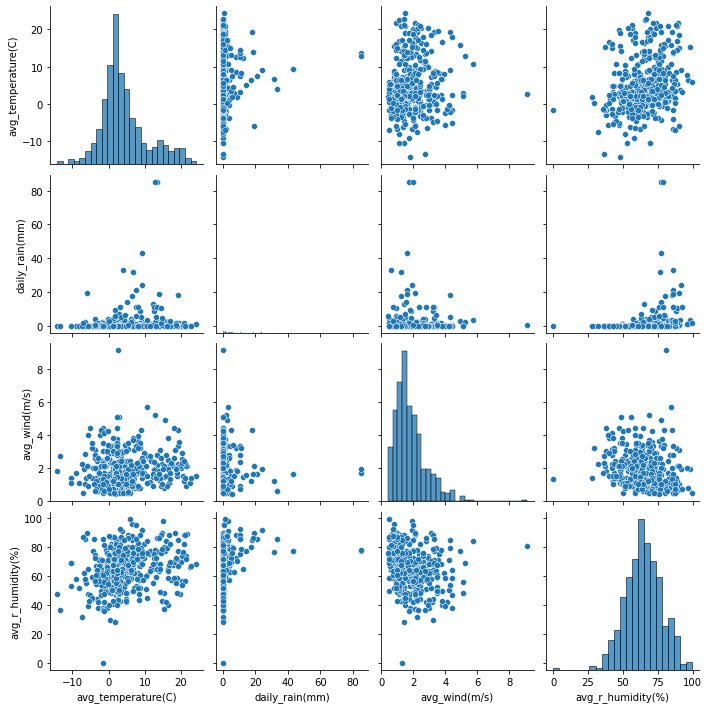

In [35]:
sns.pairplot(ave)
plt.show()
plt.close()

In [ ]:
#groupby 하기.[]
AI_ocuurdate_birds=AI_occur.groupby('발생일')['사육수']
AI_ocuurdate_birds

In [ ]:
AI_ocuurdate_birds

### 2. 사육수 별 발생 건수 연관성 ??

In [ ]:
#groupby 하기
birds_date_group=AI_occur.groupby("사육수")['발생일']
birds_date_group

In [ ]:
birds_date_gruop.groups

In [ ]:
birds_date_c=birds_date_gruop.count()
birds_date_count=pd.DataFrame(birds_date_c)
birds_date_count

In [ ]:
#사육수로 그룹화
birds_gruop=AI_occur.groupby("사육수")
birds_gruop
# groupby 를 이용해 그룹화하면 어떠한 출력 결과가 나오는 것이 아니라 
#"이 변수는 groupby 객체다." 라는 내용을 알려줍니다

In [ ]:
#변수명.groups: 인덱스가 리스트 형태로 값들이 들어 있음 확인
birds_gruop.groups

In [ ]:
import seaborn
AI_ocuur_birds.plot()

In [ ]:
AI_ocuur_birds_sum=AI_occur.groupby('발생일')['사육수'].sum().reset_index()

In [ ]:
AI_ocuur_birds_sum

In [ ]:
AI_occur